#### Discrete Simulation HW1
#### Problem 1
Authored: Austin Jetrin Maddison 6481268

In [276]:
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'  
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

In [266]:
DAYS_IN_YEAR = 365
get_ci  = lambda mean, var, n : (mean-1.96 * np.sqrt(var)/n, mean+1.96 * np.sqrt(var/n) )
np.random.seed(27)

In [267]:
def run_sim(n: int, N: int) -> tuple[float, tuple[float, float]]: 
    
    bd_lst = np.random.randint(0, 365, size=(N, n))
    
    success_occurred = np.apply_along_axis(lambda x: np.unique(x).shape[0] < n, axis=1, arr=bd_lst)
  
    success_mean = np.mean(success_occurred)
    success_var = np.var(success_occurred)
    
    ci = get_ci(success_mean, success_var, N)
    return (success_mean, ci)

Setting N

In [268]:
N = 100_000

a.)

In [269]:
n = 10
p_n ,ci = run_sim(n, N)
print(f"p_{n} = {p_n:<10.4f}")
print(f"CI  = {ci}")

p_10 = 0.1169    
CI  = (0.11685370343356169, 0.11885114913836368)


b.)

In [270]:
n = 20
p_n ,ci = run_sim(n, N)
print(f"p_{n} = {p_n:<10.4f}")
print(f"CI  = {ci}")    

p_20 = 0.4113    
CI  = (0.4112503555808057, 0.41430983313634673)


c.)

In [271]:
n = 30
p_n ,ci = run_sim(n, N)
print(f"p_{n} = {p_n:<10.4f}")
print(f"CI  = {ci}")

p_30 = 0.7059    
CI  = (0.7059410699552646, 0.7087739280970945)


d.)

In [272]:
ns = np.linspace(0, 50, 51, dtype=int)
ps = np.zeros((51, 1))

for n in ns:
    p_n ,ci = run_sim(n+1, N)   
    ps[n] = p_n

Find intersection of p(n) = ps and p(n) = 0.5

In [285]:
n = np.argmin(np.abs((np.ones((51, 1)) * 0.5) - ps)) + 1
intersection  = (n, ps[n].item())
print(f'p_{intersection[0]} = {intersection[1]}')

p_23 = 0.53788


Text(0, 0.5, '$p$')

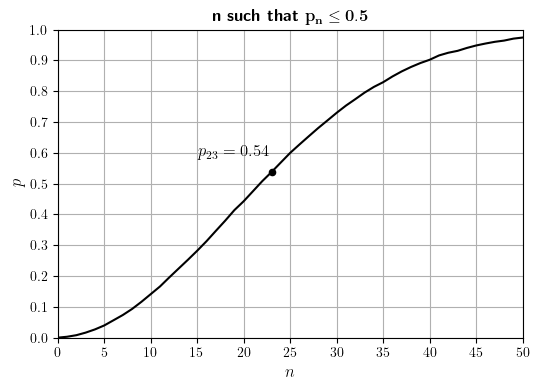

In [286]:
plt.figure(figsize=(6, 4))
# plt.axvline(intersection[0], alpha=0.3, color='k')
# plt.axhline(intersection[1], alpha=0.3, color='k')
plt.plot(ns, ps, 'k')
plt.grid()
plt.scatter(intersection[0], intersection[1], s=20, color='k')
plt.annotate(f"$p_{{{n}}} = {{{intersection[1]:.2f}}} $",(intersection[0]-8, intersection[1]+0.05), fontsize=12)
plt.xticks(np.arange(0, 51, 5, dtype=int))
plt.yticks(np.arange(0, 1.1, 0.1, dtype=float))
plt.xlim(0, 50)
plt.ylim(0, 1)
plt.title("$\\mathbf{ \\textbf{n such that }p_{n} \le 0.5}$", fontsize=12)
plt.xlabel("$n$", fontsize=12)
plt.ylabel("$p$", fontsize=12)